In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('heart_kaggle_data.csv')

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
data.shape

(918, 12)

In [6]:
pd.DataFrame(data)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [7]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
(data == 0).astype(int).sum(axis=0)

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS         704
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak           368
ST_Slope            0
HeartDisease      410
dtype: int64

## Initial Thoughts
- Who is the 1 person with a restingbp of 0?
- Why are there so many 0's for Cholesterol?
- FastingBS was a 1 if >120 mg/dl and 0 otherwise
- Old peak is a numeric value measured in depression. What other information is there on it?
- HeartDisease was 1 if they have Heart Disease and 0 if they dont

In [9]:
data.sort_values('RestingBP', ascending=True).head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1
314,53,M,ASY,80,0,0,Normal,141,Y,2.0,Down,0
227,38,M,ASY,92,117,0,Normal,134,Y,2.5,Flat,1
692,39,F,NAP,94,199,0,Normal,179,N,0.0,Up,0
832,51,M,NAP,94,227,0,Normal,154,Y,0.0,Up,0


In [10]:
data.iloc[449]

Age                   55
Sex                    M
ChestPainType        NAP
RestingBP              0
Cholesterol            0
FastingBS              0
RestingECG        Normal
MaxHR                155
ExerciseAngina         N
Oldpeak              1.5
ST_Slope            Flat
HeartDisease           1
Name: 449, dtype: object

- Entry 449 has a restingbp of 0 and 0 cholesterol. Missing Data probably

In [11]:
data.describe

<bound method NDFrame.describe of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDis

## From here forward I found the Mean, median, mode, std, range, and number of unique values foe each column where it made sense to do so

### Mean

In [12]:
data[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']].mean()

Age              53.510893
RestingBP       132.396514
Cholesterol     198.799564
FastingBS         0.233115
MaxHR           136.809368
Oldpeak           0.887364
HeartDisease      0.553377
dtype: float64

### Mode

In [13]:
data[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']].mode()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,54,120,0,0,150,0.0,1


### Standard Deviation

In [14]:
data[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']].std()

Age               9.432617
RestingBP        18.514154
Cholesterol     109.384145
FastingBS         0.423046
MaxHR            25.460334
Oldpeak           1.066570
HeartDisease      0.497414
dtype: float64

### Range

In [15]:
range_of_data = (data[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']].max() - data[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']].min())

In [16]:
print(range_of_data)

Age              49.0
RestingBP       200.0
Cholesterol     603.0
FastingBS         1.0
MaxHR           142.0
Oldpeak           8.8
HeartDisease      1.0
dtype: float64


### Number of Unique Values

In [17]:
unique_ages = len(pd.unique(data['Age']))
unique_restingbps = len(pd.unique(data['RestingBP']))
unique_cholesterols = len(pd.unique(data['Cholesterol']))
unique_fastingbs = len(pd.unique(data['FastingBS']))
unique_maxhrs = len(pd.unique(data['MaxHR']))
unique_oldpeaks = len(pd.unique(data['Oldpeak']))
unique_heartdisease = len(pd.unique(data['HeartDisease']))

In [18]:
print(unique_ages)
print(unique_restingbps)
print(unique_cholesterols)
print(unique_fastingbs)
print(unique_maxhrs)
print(unique_oldpeaks)
print(unique_heartdisease)

50
67
222
2
119
53
2


#### I need to look into what Oldpeak is and check why there are some missing values (0's) for cholesterol

In [19]:
data[data["Cholesterol"] != 0]["Cholesterol"].mean()

244.6353887399464

In [20]:
data[data["Cholesterol"] != 0]["Cholesterol"].mode()

0    254
dtype: int64

In [21]:
data[data["Cholesterol"] != 0]["Cholesterol"].median()

237.0

In [22]:
data[data["Cholesterol"] != 0]["Cholesterol"].std()

59.15352367700275

## In Exercise Angina, replace... 
    - 'N'(not present) with 0 
    - 'Y'(present) with 1

In [23]:
data['Exercise_Angina'] = data['ExerciseAngina'].replace(to_replace='N', value=0)

In [24]:
data['ExerciseAngina'] = data['Exercise_Angina'].replace(to_replace='Y', value=1)

In [25]:
data.drop(columns='Exercise_Angina')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,0,0.0,Flat,1


## For Chest Pain Type, Replace....
    - TA: Typical Angina with 0 
    - ATA: Atypical Angina with 1 
    - NAP: Non-Anginal Pain with 2 
    - ASY: Asymptomatic with 3

In [26]:
data['chest1'] = data['ChestPainType'].replace(to_replace='TA', value=0)

In [27]:
data['chest2'] = data['chest1'].replace(to_replace='ATA', value=1)

In [28]:
data['chest3'] = data['chest2'].replace(to_replace='NAP', value=2)

In [29]:
data['ChestPainType'] = data['chest3'].replace(to_replace='ASY', value=3)

In [30]:
data['chest1'] = data['ChestPainType'].replace(to_replace='TA', value=0)
data['chest2'] = data['chest1'].replace(to_replace='ATA', value=1)
data['chest3'] = data['chest2'].replace(to_replace='NAP', value=2)
data['ChestPainType'] = data['chest3'].replace(to_replace='ASY', value=3)

In [31]:
data['ChestPainType']

0      1
1      2
2      1
3      3
4      2
      ..
913    0
914    3
915    3
916    1
917    2
Name: ChestPainType, Length: 918, dtype: int64

In [32]:
data.drop(columns='chest1')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Exercise_Angina,chest2,chest3
0,40,M,1,140,289,0,Normal,172,0,0.0,Up,0,0,1,1
1,49,F,2,160,180,0,Normal,156,0,1.0,Flat,1,0,2,2
2,37,M,1,130,283,0,ST,98,0,0.0,Up,0,0,1,1
3,48,F,3,138,214,0,Normal,108,1,1.5,Flat,1,Y,3,3
4,54,M,2,150,195,0,Normal,122,0,0.0,Up,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,0,110,264,0,Normal,132,0,1.2,Flat,1,0,0,0
914,68,M,3,144,193,1,Normal,141,0,3.4,Flat,1,0,3,3
915,57,M,3,130,131,0,Normal,115,1,1.2,Flat,1,Y,3,3
916,57,F,1,130,236,0,LVH,174,0,0.0,Flat,1,0,1,1


In [33]:
data = data.drop(columns=['Exercise_Angina', 'chest1', 'chest2', 'chest3'])

In [34]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,1,140,289,0,Normal,172,0,0.0,Up,0
1,49,F,2,160,180,0,Normal,156,0,1.0,Flat,1
2,37,M,1,130,283,0,ST,98,0,0.0,Up,0
3,48,F,3,138,214,0,Normal,108,1,1.5,Flat,1
4,54,M,2,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,0,110,264,0,Normal,132,0,1.2,Flat,1
914,68,M,3,144,193,1,Normal,141,0,3.4,Flat,1
915,57,M,3,130,131,0,Normal,115,1,1.2,Flat,1
916,57,F,1,130,236,0,LVH,174,0,0.0,Flat,1


## For ST_Slope I will replace the following... 
    - Up: upsloping with 0 
    - Flat: flat with 1
    - Down: downsloping with 2

In [35]:
data['st1'] = data['ST_Slope'].replace(to_replace='Up', value=0)
data['st2'] = data['st1'].replace(to_replace='Flat', value=1)
data['ST_Slope'] = data['st2'].replace(to_replace='Down', value=2)

In [36]:
data = data.drop(columns=['st1', 'st2'])

In [37]:
data.describe()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,2.251634,132.396514,198.799564,0.233115,136.809368,0.404139,0.887364,0.638344,0.553377
std,9.432617,0.931031,18.514154,109.384145,0.423046,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,2.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,3.000000,130.000000,223.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,3.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,3.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,2.000000,1.000000


- I will impute missing cholesterol values with the average

In [38]:
data['Age'].max()

77

In [39]:
data['Age'].min()

28

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

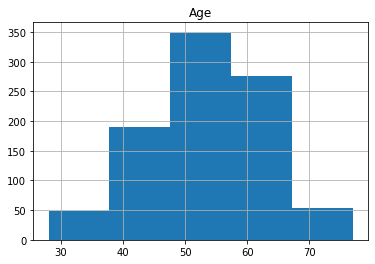

In [40]:
data.hist(column='Age', bins=5)


## Now i will break up the data into 4 pieces
    - Those under 40
    - From 40 to 50
    - From 50 to 60
    - Those over 60

In [41]:
age_under_40 = data[data['Age']<40]

In [42]:
age_under_40

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
2,37,M,1,130,283,0,ST,98,0,0.0,0,0
5,39,M,2,120,339,0,Normal,170,0,0.0,0,0
8,37,M,3,140,207,0,Normal,130,1,1.5,1,1
10,37,F,2,130,211,0,Normal,142,0,0.0,0,0
12,39,M,1,120,204,0,Normal,145,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
846,39,M,3,118,219,0,Normal,140,0,1.2,1,1
856,39,M,2,140,321,0,LVH,182,0,0.0,0,0
892,39,F,2,138,220,0,Normal,152,0,0.0,1,0
898,35,M,1,122,192,0,Normal,174,0,0.0,0,0


In [43]:
over_40 = data[data['Age']>=40]

In [44]:
age_40_to_50 = over_40[over_40['Age']<50]

In [45]:
age_40_to_50

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,1,140,289,0,Normal,172,0,0.0,0,0
1,49,F,2,160,180,0,Normal,156,0,1.0,1,1
3,48,F,3,138,214,0,Normal,108,1,1.5,1,1
6,45,F,1,130,237,0,Normal,170,0,0.0,0,0
9,48,F,1,120,284,0,Normal,120,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,43,M,3,132,247,1,LVH,143,1,0.1,1,1
896,47,M,2,130,253,0,Normal,179,0,0.0,0,0
907,44,M,3,120,169,0,Normal,144,1,2.8,2,1
910,41,M,1,120,157,0,Normal,182,0,0.0,0,0


In [46]:
over_50 = data[data['Age']>=50]

In [47]:
age_50_to_60 = over_50[over_50['Age']<60]

In [48]:
age_50_to_60

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
4,54,M,2,150,195,0,Normal,122,0,0.0,0,0
7,54,M,1,110,208,0,Normal,142,0,0.0,0,0
11,58,M,1,136,164,0,ST,99,1,2.0,1,1
15,54,F,1,120,273,0,Normal,150,0,1.5,1,0
26,53,M,3,124,260,0,ST,112,1,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
906,55,F,1,132,342,0,Normal,166,0,1.2,0,0
911,59,M,3,164,176,1,LVH,90,0,1.0,1,1
912,57,F,3,140,241,0,Normal,123,1,0.2,1,1
915,57,M,3,130,131,0,Normal,115,1,1.2,1,1


In [49]:
age_over_60 = data[data['Age']>=60]

In [50]:
age_over_60

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
18,60,M,3,100,248,0,Normal,125,0,1.0,1,1
36,65,M,3,140,306,1,Normal,87,1,1.5,1,1
82,63,M,3,150,223,0,Normal,115,0,0.0,1,1
85,66,M,3,140,139,0,Normal,94,1,1.0,1,1
86,65,M,3,170,263,1,Normal,112,1,2.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
899,61,M,3,148,203,0,Normal,161,0,0.0,0,1
905,67,M,2,152,212,0,LVH,150,0,0.8,1,1
908,63,M,3,140,187,0,LVH,144,1,4.0,0,1
909,63,F,3,124,197,0,Normal,136,1,0.0,1,1


## Here I will look at the different counts for each metric based on age
    - age_under_40 = (age < 40)
    - age_40_to_50 = (40 <= age < 50)
    - age_50_to_60 = (50 <= age < 60)
    - age_over_60 = (age >= 60)

In [51]:
age_under_40.describe()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000
mean,35.900000,1.850000,123.887500,203.47500,0.100000,157.162500,0.175000,0.432500,0.362500,0.32500
std,2.853379,0.982119,16.778523,96.92787,0.301893,22.569411,0.382364,0.883717,0.533528,0.47133
min,28.000000,0.000000,92.000000,0.00000,0.000000,98.000000,0.000000,-1.100000,0.000000,0.00000
25%,34.000000,1.000000,114.250000,171.50000,0.000000,141.500000,0.000000,0.000000,0.000000,0.00000
50%,37.000000,2.000000,120.000000,214.50000,0.000000,159.000000,0.000000,0.000000,0.000000,0.00000
75%,38.000000,3.000000,130.000000,263.25000,0.000000,175.000000,0.000000,0.700000,1.000000,1.00000
max,39.000000,3.000000,190.000000,529.00000,1.000000,202.000000,1.000000,3.800000,2.000000,1.00000


In [52]:
age_40_to_50.describe()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,44.796209,2.137441,127.355450,218.805687,0.123223,145.763033,0.289100,0.581043,0.488152,0.402844
std,2.838709,0.928425,15.749277,86.986344,0.329474,24.012313,0.454422,0.916474,0.572049,0.491636
min,40.000000,0.000000,95.000000,0.000000,0.000000,80.000000,0.000000,-2.600000,0.000000,0.000000
25%,42.000000,1.000000,118.000000,197.000000,0.000000,127.500000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,2.000000,128.000000,233.000000,0.000000,146.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,3.000000,139.000000,266.000000,0.000000,167.500000,1.000000,1.000000,1.000000,1.000000
max,49.000000,3.000000,180.000000,491.000000,1.000000,194.000000,1.000000,3.600000,2.000000,1.000000


In [53]:
age_50_to_60.describe()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,54.705882,2.288770,133.505348,199.770053,0.256684,134.548128,0.435829,0.914171,0.652406,0.566845
std,2.733786,0.895046,19.264178,111.962798,0.437389,24.120043,0.496529,1.055351,0.592203,0.496175
min,50.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.000000,0.000000,0.000000
25%,52.000000,2.000000,120.000000,176.250000,0.000000,119.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,3.000000,130.000000,221.500000,0.000000,135.000000,0.000000,0.750000,1.000000,1.000000
75%,57.000000,3.000000,140.000000,267.750000,1.000000,154.000000,1.000000,1.500000,1.000000,1.000000
max,59.000000,3.000000,200.000000,603.000000,1.000000,195.000000,1.000000,5.600000,2.000000,1.000000


In [54]:
age_over_60.describe()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,64.581028,2.418972,137.652174,179.201581,0.332016,126.249012,0.525692,1.247036,0.830040,0.731225
std,4.029450,0.924939,18.145071,122.491962,0.471870,23.223834,0.500329,1.127383,0.616222,0.444201
min,60.000000,0.000000,95.000000,0.000000,0.000000,63.000000,0.000000,-0.900000,0.000000,0.000000
25%,62.000000,2.000000,125.000000,0.000000,0.000000,112.000000,0.000000,0.100000,0.000000,0.000000
50%,63.000000,3.000000,139.000000,219.000000,0.000000,126.000000,1.000000,1.200000,1.000000,1.000000
75%,67.000000,3.000000,150.000000,267.000000,1.000000,143.000000,1.000000,2.000000,1.000000,1.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,179.000000,1.000000,6.200000,2.000000,1.000000


# As age increases I noticed the following things...
    - Average RestingBP increased
    - Average Cholesterol mostly decreased (I wonder what happens if I exclude those values with a 0)
    - Average FastingBS values increase
    - Average MaxHR decreased
    - Average Oldpeak score increased
    - Average HeartDisease Metric increased (More heart disease present)
    - Average Chest Pain Type increased with age
    - Average Exercise Angina increased with age
    - Average ST_Slope number increased with age

In [55]:
age_under_40[age_under_40["Cholesterol"] != 0]["Cholesterol"].describe()

count     70.000000
mean     232.542857
std       62.442945
min      117.000000
25%      194.500000
50%      220.000000
75%      269.250000
max      529.000000
Name: Cholesterol, dtype: float64

In [56]:
age_40_to_50[age_40_to_50["Cholesterol"] != 0]["Cholesterol"].describe()

count    191.000000
mean     241.717277
std       52.875660
min      141.000000
25%      207.500000
50%      237.000000
75%      269.000000
max      491.000000
Name: Cholesterol, dtype: float64

In [57]:
age_50_to_60[age_50_to_60["Cholesterol"] != 0]["Cholesterol"].describe()

count    303.000000
mean     246.580858
std       62.465402
min       85.000000
25%      207.500000
50%      233.000000
75%      278.000000
max      603.000000
Name: Cholesterol, dtype: float64

In [58]:
age_over_60[age_over_60["Cholesterol"] != 0]["Cholesterol"].describe()

count    182.000000
mean     249.109890
std       58.128064
min      110.000000
25%      212.000000
50%      248.000000
75%      281.750000
max      564.000000
Name: Cholesterol, dtype: float64

- When i exclude those values with a 0 for cholesterol, the average cholesterol increases with age...

- General Outlier Analysis of whole dataframe

In [59]:
data[['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']].describe() 

,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000
mean,132.396514,198.799564,136.809368,0.887364
std,18.514154,109.384145,25.460334,1.066570
min,0.000000,0.000000,60.000000,-2.600000
25%,120.000000,173.250000,120.000000,0.000000
50%,130.000000,223.000000,138.000000,0.600000
75%,140.000000,267.000000,156.000000,1.500000
max,200.000000,603.000000,202.000000,6.200000


In [60]:
data[data["RestingBP"] != 0]["RestingBP"].describe()

count    917.000000
mean     132.540894
std       17.999749
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

In [61]:
data[data["Cholesterol"] != 0]["Cholesterol"].describe()

count    746.000000
mean     244.635389
std       59.153524
min       85.000000
25%      207.250000
50%      237.000000
75%      275.000000
max      603.000000
Name: Cholesterol, dtype: float64

### The following are the outliers for Resting Blood Pressure

In [65]:
print(np.percentile(data['RestingBP'], [2.5, 97.5]))

print(np.where(data[data['RestingBP'] != 0]['RestingBP']<100))
print(np.where(data[data['RestingBP'] != 0]['RestingBP']>174.3))

[100.  174.3]
(array([227, 267, 294, 304, 309, 314, 328, 333, 339, 518, 691, 831],
      dtype=int64),)
(array([109, 123, 189, 190, 241, 274, 275, 278, 365, 372, 399, 411, 423,
       474, 584, 591, 701, 724, 731, 758, 773, 779, 854], dtype=int64),)


### The following are the outliers for Cholesterol

In [69]:
print(np.percentile(data['Cholesterol'], [2.5, 97.5]))

print(np.where(data[data["Cholesterol"] != 0]["Cholesterol"]<0))
print(np.where(data[data["Cholesterol"] != 0]["Cholesterol"]>358.5))

[  0.   358.15]
(array([], dtype=int64),)
(array([ 28,  30,  58,  69,  76, 102, 103, 123, 132, 149, 182, 250, 256,
       330, 332, 405, 441, 444, 452, 495, 566, 624, 631], dtype=int64),)


### The following are the outliers for MaxHR

In [71]:
print(np.percentile(data['MaxHR'], [2.5, 97.5]))

print(np.where(data['MaxHR']<86))
print(np.where(data['MaxHR']>182))

[ 86. 182.]
(array([ 68, 318, 328, 331, 360, 370, 388, 390, 399, 402, 407, 410, 432,
       456, 461, 496, 507, 550, 582, 716], dtype=int64),)
(array([ 48,  67, 118, 126, 171, 208, 223, 229, 654, 666, 681, 753, 759,
       795, 824, 829, 844, 847, 866], dtype=int64),)


### The following are the outliers for Oldpeak

In [72]:
print(np.percentile(data['Oldpeak'], [2.5, 97.5]))

print(np.where(data['Oldpeak']<0))
print(np.where(data['Oldpeak']>1.5))

[0.  3.4]
(array([321, 324, 325, 326, 331, 332, 334, 335, 352, 407, 413, 421, 512],
      dtype=int64),)
(array([ 11,  19,  23,  26,  32,  33,  50,  51,  68,  86,  87,  95, 102,
       111, 127, 132, 137, 139, 140, 141, 142, 155, 158, 165, 166, 174,
       175, 180, 182, 227, 236, 238, 239, 241, 242, 245, 247, 251, 254,
       269, 272, 276, 281, 282, 288, 299, 303, 304, 312, 314, 317, 318,
       319, 320, 322, 323, 330, 336, 337, 338, 348, 366, 368, 369, 371,
       378, 382, 394, 403, 410, 414, 416, 419, 424, 432, 433, 437, 440,
       445, 447, 450, 453, 460, 464, 466, 468, 469, 471, 473, 477, 478,
       479, 480, 481, 482, 487, 489, 492, 493, 494, 497, 500, 501, 502,
       504, 506, 511, 515, 521, 526, 531, 533, 534, 537, 538, 541, 543,
       550, 552, 553, 556, 557, 559, 562, 564, 565, 569, 570, 576, 577,
       578, 579, 586, 588, 592, 598, 606, 615, 616, 624, 628, 630, 631,
       632, 633, 635, 643, 646, 648, 651, 659, 665, 671, 679, 685, 691,
       695, 696, 698, 702, 704